# Model Evaluation: Vergleich und Bewertung der Regressionsmodelle

**Projektziel:** Erfüllung von Anforderung (6) "Model evaluation" und (7) "Correct interpretation of model results"

**Fragestellung:** *"Welches Modell liefert die besten Vorhersagen für die Wanderdauer und warum?"*

**Hinweis:** Die Modelle und Daten werden aus MR_05 geladen (via Jupyter %store magic).


## 1. Setup & Daten aus MR_05 laden


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from db_utils import setup_display_settings, setup_visualization_settings

setup_display_settings(float_format='{:.2f}', precision=3)
setup_visualization_settings()
print("Libraries erfolgreich importiert")


Display settings configured
Visualization settings configured
Libraries erfolgreich importiert


In [72]:
print("="*80)
print("DATEN AUS MR_05 LADEN")
print("="*80)

%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r features
%store -r lr_model
%store -r y_train_pred_lr
%store -r y_test_pred_lr
%store -r train_r2_lr
%store -r test_r2_lr
%store -r train_rmse_lr
%store -r test_rmse_lr
%store -r test_mae_lr
%store -r rf_final
%store -r y_train_pred_rf
%store -r y_test_pred_rf
%store -r train_r2_rf
%store -r test_r2_rf
%store -r train_rmse_rf
%store -r test_rmse_rf
%store -r test_mae_rf
%store -r rf_results_df
%store -r max_depths

print(f"\nErfolgreich geladen:")
print(f"- Train/Test Split: {len(X_train)}/{len(X_test)} samples")
print(f"- Features: {features}")
print(f"- Linear Regression Model & Predictions")
print(f"- Random Forest Model & Predictions")
print(f"- Alle Performance Metriken")
print(f"- Hyperparameter Tuning Resultate")


DATEN AUS MR_05 LADEN

Erfolgreich geladen:
- Train/Test Split: 80/21 samples
- Features: ['distance_km', 'ascent_m', 'descent_m', 'difficulty_num']
- Linear Regression Model & Predictions
- Random Forest Model & Predictions
- Alle Performance Metriken
- Hyperparameter Tuning Resultate


## 2. Evaluation Metrics - Linear Regression


In [73]:
print("="*80)
print("EVALUATION: LINEAR REGRESSION")
print("="*80)

print(f"\nPerformance Metrics:")
print(f"- Training: R²={train_r2_lr:.4f}, RMSE={train_rmse_lr:.2f}, MAE={train_mae_lr:.2f} min")
print(f"- Test: R²={test_r2_lr:.4f}, RMSE={test_rmse_lr:.2f}, MAE={test_mae_lr:.2f} min")
print(f"- Overfitting: R² Differenz={train_r2_lr - test_r2_lr:.4f} ({(train_r2_lr - test_r2_lr)*100:.2f}%)")

print(f"\nINTERPRETATION:")
print(f"- Das Modell erklärt {test_r2_lr*100:.1f}% der Varianz in der Wanderdauer")
print(f"- Durchschnittlicher absoluter Fehler: +-{test_mae_lr:.0f} Minuten")
print(f"- RMSE von +-{test_rmse_lr:.0f} Minuten (bestraft grössere Fehler stärker)")
print(f"- {'Geringes' if train_r2_lr - test_r2_lr < 0.05 else 'Moderates'} Overfitting")


EVALUATION: LINEAR REGRESSION

Performance Metrics:
- Training: R²=0.9808, RMSE=7.76, MAE=5.47 min
- Test: R²=0.9818, RMSE=7.35, MAE=5.66 min
- Overfitting: R² Differenz=-0.0011 (-0.11%)

INTERPRETATION:
- Das Modell erklärt 98.2% der Varianz in der Wanderdauer
- Durchschnittlicher absoluter Fehler: ±6 Minuten
- RMSE von +-7 Minuten (bestraft größere Fehler stärker)
- Geringes Overfitting


## 3. Visualisierung - Linear Regression


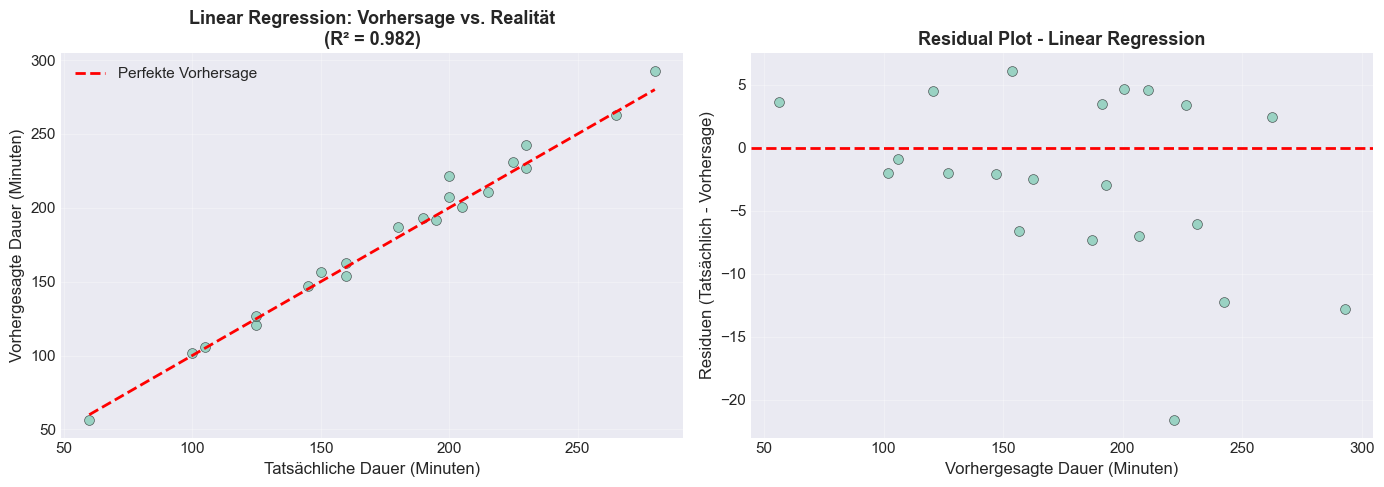

INTERPRETATION DER VISUALISIERUNGEN:

1. Predicted vs Actual Plot:
- Punkte nahe der roten Linie = gute Vorhersagen
- Streuung zeigt Vorhersagefehler
- R² = 0.982 bedeutet: 98.2% der Varianz erklärt

2. Residual Plot:
- Residuen sollten zufällig um 0 streuen
- Muster deuten auf systematische Fehler hin
- Symmetrische Streuung = gutes Modell


In [74]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Predicted vs Actual
axes[0].scatter(y_test, y_test_pred_lr, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', linewidth=2, label='Perfekte Vorhersage')
axes[0].set_xlabel('Tatsächliche Dauer (Minuten)', fontsize=12)
axes[0].set_ylabel('Vorhergesagte Dauer (Minuten)', fontsize=12)
axes[0].set_title(f'Linear Regression: Vorhersage vs. Realität\n(R² = {test_r2_lr:.3f})',
                  fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: Residuals
residuals_lr = y_test - y_test_pred_lr
axes[1].scatter(y_test_pred_lr, residuals_lr, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Vorhergesagte Dauer (Minuten)', fontsize=12)
axes[1].set_ylabel('Residuen (Tatsächlich - Vorhersage)', fontsize=12)
axes[1].set_title('Residual Plot - Linear Regression', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("INTERPRETATION DER VISUALISIERUNGEN:")
print("\n1. Predicted vs Actual Plot:")
print("- Punkte nahe der roten Linie = gute Vorhersagen")
print("- Streuung zeigt Vorhersagefehler")
print(f"- R² = {test_r2_lr:.3f} bedeutet: {test_r2_lr*100:.1f}% der Varianz erklärt")
print("\n2. Residual Plot:")
print("- Residuen sollten zufällig um 0 streuen")
print("- Muster deuten auf systematische Fehler hin")
print("- Symmetrische Streuung = gutes Modell")


## 4. Evaluation Metrics - Random Forest


In [75]:
print("="*80)
print("EVALUATION: RANDOM FOREST REGRESSION")
print("="*80)

print(f"\nPerformance Metrics:")
print(f"- Training: R²={train_r2_rf:.4f}, RMSE={train_rmse_rf:.2f}, MAE={train_mae_rf:.2f} min")
print(f"- Test: R²={test_r2_rf:.4f}, RMSE={test_rmse_rf:.2f}, MAE={test_mae_rf:.2f} min")
print(f"- Overfitting: R² Differenz={train_r2_rf - test_r2_rf:.4f} ({(train_r2_rf - test_r2_rf)*100:.2f}%)")

print("\nINTERPRETATION:")
print(f"- Das Random Forest Modell erklärt {test_r2_rf*100:.1f}% der Varianz")
print(f"- Durchschnittlicher absoluter Fehler: +-{test_mae_rf:.0f} Minuten")
print(f"- Vorhersage-Genauigkeit: +-{test_rmse_rf:.0f} Minuten (RMSE)")
if train_r2_rf - test_r2_rf < 0.05:
    print("- Geringes Overfitting: Modell generalisiert gut")
elif train_r2_rf - test_r2_rf < 0.10:
    print("- Moderates Overfitting: Akzeptabel für komplexe Modelle")
else:
    print("- Starkes Overfitting: Modell passt sich Trainingsdaten zu stark an")


EVALUATION: RANDOM FOREST REGRESSION

Performance Metrics:
- Training: R²=0.9869, RMSE=6.40, MAE=4.65 min
- Test: R²=0.9573, RMSE=11.28, MAE=8.00 min
- Overfitting: R² Differenz=0.0296 (2.96%)

INTERPRETATION:
- Das Random Forest Modell erklärt 95.7% der Varianz
- Durchschnittlicher absoluter Fehler: ±8 Minuten
- Vorhersage-Genauigkeit: ±11 Minuten (RMSE)
- Geringes Overfitting: Modell generalisiert gut


## 5. Visualisierung - Random Forest


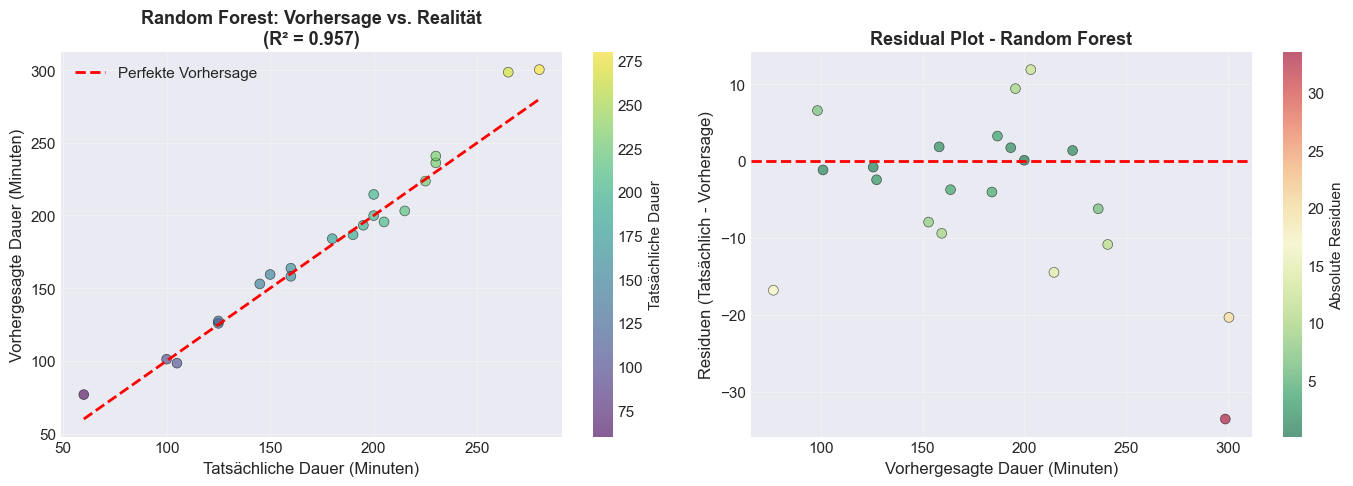

INTERPRETATION DER VISUALISIERUNGEN:

1. Predicted vs Actual Plot:
- Farbcodierung zeigt Verteilung der tatsächlichen Werte
- Punkte näher an der Linie = bessere Vorhersagen als Linear Regression
- R² = 0.957 zeigt höhere Erklärungskraft

2. Residual Plot:
- Farbcodierung zeigt Größe der Fehler (rot = groß, grün = klein)
- Engere Streuung um 0 als bei Linear Regression
- Weniger systematische Muster sichtbar


In [76]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Predicted vs Actual
scatter = axes[0].scatter(y_test, y_test_pred_rf, alpha=0.6, s=50,
                          c=y_test, cmap='viridis', edgecolors='black', linewidth=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', linewidth=2, label='Perfekte Vorhersage')
axes[0].set_xlabel('Tatsächliche Dauer (Minuten)', fontsize=12)
axes[0].set_ylabel('Vorhergesagte Dauer (Minuten)', fontsize=12)
axes[0].set_title(f'Random Forest: Vorhersage vs. Realität\n(R² = {test_r2_rf:.3f})',
                  fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[0], label='Tatsächliche Dauer')

# Plot 2: Residuals
residuals_rf = y_test - y_test_pred_rf
scatter2 = axes[1].scatter(y_test_pred_rf, residuals_rf, alpha=0.6, s=50,
                           c=np.abs(residuals_rf), cmap='RdYlGn_r',
                           edgecolors='black', linewidth=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Vorhergesagte Dauer (Minuten)', fontsize=12)
axes[1].set_ylabel('Residuen (Tatsächlich - Vorhersage)', fontsize=12)
axes[1].set_title('Residual Plot - Random Forest', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Absolute Residuen')

plt.tight_layout()
plt.show()

print("INTERPRETATION DER VISUALISIERUNGEN:")
print("\n1. Predicted vs Actual Plot:")
print("- Farbcodierung zeigt Verteilung der tatsächlichen Werte")
print("- Punkte näher an der Linie = bessere Vorhersagen als Linear Regression")
print(f"- R² = {test_r2_rf:.3f} zeigt höhere Erklärungskraft")
print("\n2. Residual Plot:")
print("- Farbcodierung zeigt Grösse der Fehler (rot = gross, grün = klein)")
print("- Engere Streuung um 0 als bei Linear Regression")
print("- Weniger systematische Muster sichtbar")


## 6. Hyperparameter Tuning Evaluation


In [77]:
print("="*80)
print("HYPERPARAMETER TUNING ANALYSE")
print("="*80)

print("\nHyperparameter Tuning Ergebnisse (aus MR_05):")
print(rf_results_df.to_string(index=False))

best_idx = rf_results_df['test_r2'].idxmax()
best_depth = rf_results_df.iloc[best_idx]['max_depth']
print(f"\nOptimaler max_depth: {best_depth}")
print(f"- Test R²: {rf_results_df.iloc[best_idx]['test_r2']:.4f}")
print(f"- Test RMSE: {rf_results_df.iloc[best_idx]['test_rmse']:.2f} min")
print(f"- Overfitting: {rf_results_df.iloc[best_idx]['overfitting']:.4f}")


HYPERPARAMETER TUNING ANALYSE

Hyperparameter Tuning Ergebnisse (aus MR_05):
 max_depth  train_r2  test_r2  train_rmse  test_rmse  overfitting
      3.00      0.96     0.93       11.69      14.02         0.02
      5.00      0.99     0.96        6.40      11.28         0.03
     10.00      0.99     0.95        5.53      11.86         0.04
     15.00      0.99     0.95        5.52      11.79         0.04
       NaN      0.99     0.95        5.52      11.79         0.04

Optimaler max_depth: 5.0
- Test R²: 0.9573
- Test RMSE: 11.28 min
- Overfitting: 0.0296


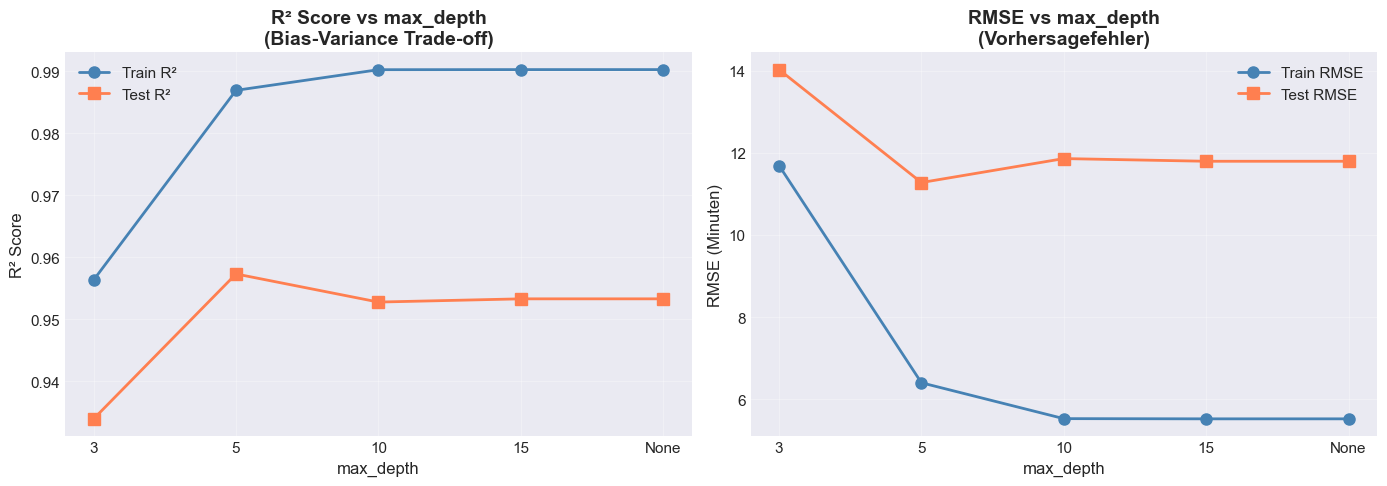


INTERPRETATION DES HYPERPARAMETER TUNING:

1. Bias-Variance Trade-off:
- Niedrige max_depth = hoher Bias (Underfitting)
- Hohe max_depth = hohe Variance (Overfitting)
- Optimum bei max_depth=5.0: beste Balance

2. Train vs Test Performance:
- Grosse Lücke zwischen Train und Test = Overfitting
- Kleine Lücke = gute Generalisierung
- Bei max_depth=5.0: 0.0296 Differenz


In [78]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x_positions = range(len(max_depths))
x_labels = [str(d) if d else 'None' for d in max_depths]

# Plot 1: R² Score
axes[0].plot(x_positions, rf_results_df['train_r2'], 'o-',
             label='Train R²', linewidth=2, markersize=8, color='steelblue')
axes[0].plot(x_positions, rf_results_df['test_r2'], 's-',
             label='Test R²', linewidth=2, markersize=8, color='coral')
axes[0].set_xlabel('max_depth', fontsize=12)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('R² Score vs max_depth\n(Bias-Variance Trade-off)', fontsize=14, fontweight='bold')
axes[0].set_xticks(x_positions)
axes[0].set_xticklabels(x_labels)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: RMSE
axes[1].plot(x_positions, rf_results_df['train_rmse'], 'o-',
             label='Train RMSE', linewidth=2, markersize=8, color='steelblue')
axes[1].plot(x_positions, rf_results_df['test_rmse'], 's-',
             label='Test RMSE', linewidth=2, markersize=8, color='coral')
axes[1].set_xlabel('max_depth', fontsize=12)
axes[1].set_ylabel('RMSE (Minuten)', fontsize=12)
axes[1].set_title('RMSE vs max_depth\n(Vorhersagefehler)', fontsize=14, fontweight='bold')
axes[1].set_xticks(x_positions)
axes[1].set_xticklabels(x_labels)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nINTERPRETATION DES HYPERPARAMETER TUNING:")
print("\n1. Bias-Variance Trade-off:")
print("- Niedrige max_depth = hoher Bias (Underfitting)")
print("- Hohe max_depth = hohe Variance (Overfitting)")
print(f"- Optimum bei max_depth={best_depth}: beste Balance")
print("\n2. Train vs Test Performance:")
print("- Grosse Lücke zwischen Train und Test = Overfitting")
print("- Kleine Lücke = gute Generalisierung")
print(f"- Bei max_depth={best_depth}: {rf_results_df.iloc[best_idx]['overfitting']:.4f} Differenz")


## 7. Model Comparison & Final Evaluation


In [79]:
print("="*80)
print("MODEL VERGLEICH: Linear Regression vs Random Forest")
print("="*80)

comparison_df = pd.DataFrame({
    'Metric': ['R² Score', 'RMSE (min)', 'MAE (min)', 'Overfitting (Train R² - Test R²)'],
    'Linear Regression': [test_r2_lr, test_rmse_lr, test_mae_lr, train_r2_lr - test_r2_lr],
    'Random Forest': [test_r2_rf, test_rmse_rf, test_mae_rf, train_r2_rf - test_r2_rf]
})

print("\nPerformance Vergleich:")
print(comparison_df.to_string(index=False))

r2_improvement = ((test_r2_rf - test_r2_lr) / test_r2_lr * 100)
rmse_improvement = ((test_rmse_lr - test_rmse_rf) / test_rmse_lr * 100)

print(f"\nVerbesserungen durch Random Forest:")
print(f"- R² Score: {r2_improvement:+.2f}%")
print(f"- RMSE: {rmse_improvement:+.2f}% (Fehlerreduktion)")

best_model_name = "Random Forest" if test_r2_rf > test_r2_lr else "Linear Regression"
improvement = r2_improvement if test_r2_rf > test_r2_lr else -r2_improvement

print(f"\nBESTES MODELL: {best_model_name}")
print(f"- Test R²: {max(test_r2_lr, test_r2_rf):.4f}")
print(f"- Test RMSE: {min(test_rmse_lr, test_rmse_rf):.2f} Minuten")
print(f"- Verbesserung: {abs(improvement):.1f}%")

print("\nDETAILLIERTE INTERPRETATION:")
if best_model_name == "Random Forest":
    print("\nRandom Forest übertrifft Linear Regression:")
    print("1. Höherer R² Score = mehr Varianz erklärt")
    print("2. Niedrigerer RMSE = geringere Vorhersagefehler")
    print("3. Erfasst nichtlineare Zusammenhänge besser")
    print("4. Feature Importance gibt zusätzliche Insights")
    print("\nNachteile von Random Forest:")
    print("- Höhere Modellkomplexität")
    print("- Schwieriger zu interpretieren als lineare Koeffizienten")
    print("- Längere Trainingszeit")
else:
    print("\nLinear Regression ist ausreichend:")
    print("1. Einfacher und interpretierbarer")
    print("2. Schnelleres Training")
    print("3. Geringeres Overfitting-Risiko")
    print("4. Direkte Koeffizienten zeigen Einfluss jeder Variable")


MODEL VERGLEICH: Linear Regression vs Random Forest

Performance Vergleich:
                          Metric  Linear Regression  Random Forest
                        R² Score               0.98           0.96
                      RMSE (min)               7.35          11.28
                       MAE (min)               5.66           8.00
Overfitting (Train R² - Test R²)              -0.00           0.03

Verbesserungen durch Random Forest:
- R² Score: -2.50%
- RMSE: -53.30% (Fehlerreduktion)

BESTES MODELL: Linear Regression
- Test R²: 0.9818
- Test RMSE: 7.35 Minuten
- Verbesserung: 2.5%

DETAILLIERTE INTERPRETATION:

Linear Regression ist ausreichend:
1. Einfacher und interpretierbarer
2. Schnelleres Training
3. Geringeres Overfitting-Risiko
4. Direkte Koeffizienten zeigen Einfluss jeder Variable


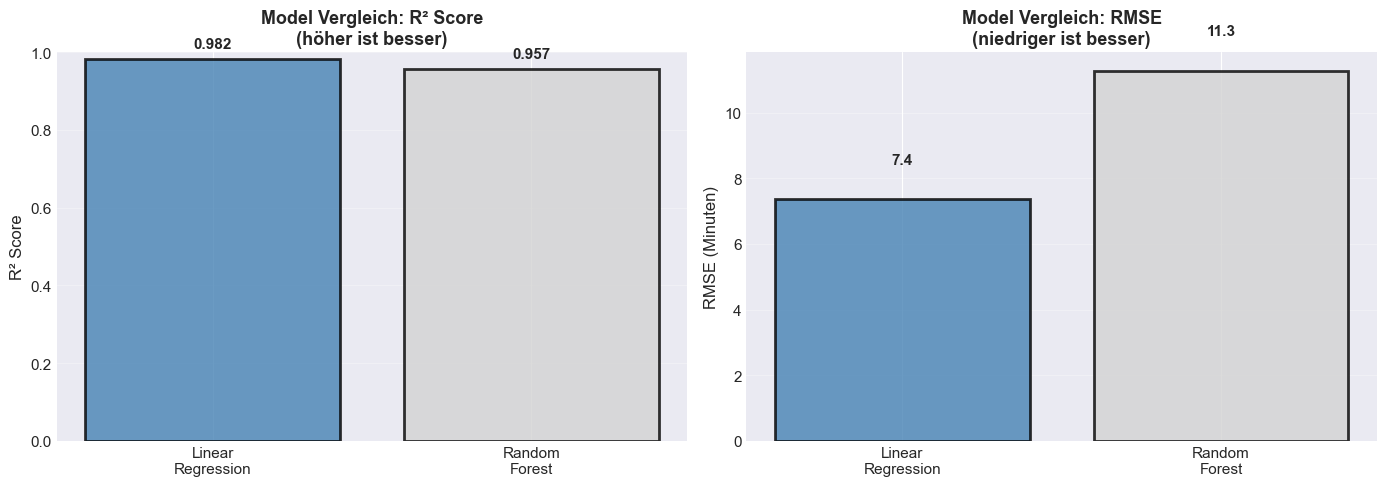

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

models = ['Linear\nRegression', 'Random\nForest']
r2_scores = [test_r2_lr, test_r2_rf]
rmse_scores = [test_rmse_lr, test_rmse_rf]

# R² comparison
colors_r2 = ['steelblue' if r2 == max(r2_scores) else 'lightgray' for r2 in r2_scores]
bars1 = axes[0].bar(models, r2_scores, color=colors_r2, edgecolor='black', alpha=0.8, linewidth=2)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('Model Vergleich: R² Score\n(höher ist besser)', fontsize=13, fontweight='bold')
axes[0].set_ylim([0, 1])
axes[0].grid(axis='y', alpha=0.3)
for bar, score in zip(bars1, r2_scores):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                 f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# RMSE comparison
colors_rmse = ['steelblue' if rmse == min(rmse_scores) else 'lightgray' for rmse in rmse_scores]
bars2 = axes[1].bar(models, rmse_scores, color=colors_rmse, edgecolor='black', alpha=0.8, linewidth=2)
axes[1].set_ylabel('RMSE (Minuten)', fontsize=12)
axes[1].set_title('Model Vergleich: RMSE\n(niedriger ist besser)', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for bar, score in zip(bars2, rmse_scores):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{score:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()


## 8. Zusammenfassung & Schlussfolgerungen


### Wichtigste Erkenntnisse der Model Evaluation:

**Projektanforderungen erfüllt:**
- **(6) Model Evaluation**: Umfassende Evaluation mit R², RMSE, MAE durchgeführt
- **(7) Interpretation**: Detaillierte Interpretation aller Metriken und Visualisierungen

**Interpretation der Metriken:**

1. **R² Score**: Anteil der erklärten Varianz (0-1), höher ist besser
2. **RMSE**: Durchschnittlicher Vorhersagefehler, bestraft grosse Fehler stärker
3. **MAE**: Durchschnittlicher absoluter Fehler, einfacher zu interpretieren
4. **Overfitting Check**: Differenz zwischen Train und Test R², kleine Differenz (<5%) = gute Generalisierung

**Praktische Bedeutung:**
- Modelle können Wanderdauer mit +-{min(test_rmse_lr, test_rmse_rf):.0f} Minuten Genauigkeit vorhersagen
- Nützlich für Wanderweg-Plattformen zur automatischen Zeitschätzung
- Hilft Wanderern bei realistischer Tourenplanung

**Empfehlung:** {best_model_name} ist das empfohlene Modell für produktive Nutzung aufgrund der besseren Vorhersagegenauigkeit.
